## Data Preprocessing Plans:

We have 5 tasks:

1) Linear Regression (Lets predict median house value)
2) Support Vector machines: Let's see if we can classify a city block's population as dense (Dense will be an abritrary label of where population >1500).
3) Decision Trees: Will attempt to predict ocean proximity label based on everything except latitude and longitude.
4) Random Forests: Same prediction as decision trees but will compare results between the two.
5) Neural Networks: Goal to predict median income in the city block given all labels (including latitude longitude).

### Data
[data](https://www.kaggle.com/datasets/dhirajnirne/california-housing-data/data)

The way that this data is setup is such that every column is a aggregate of a city block. Median Income is measured in tens of thousands of dollars (lets change that). 

### Steps:
First to prep for our SVM we have to create the dense/sparse population block column. After we do that lets update our median income column to reflect real median income in dollars as opposed to tens of thousands of dollars. We'll then use the OneHotEncoder module to encode our categorical features as 0 and 1's, then finally we'll transform our numerical features using the standard scaler module. As a note, latitude and longtidue are both special categories in that standard scaling them doesn't make sense, nor does it make sense to encode them, so we're going to pull them out and attach them to these cleaned and encoded features at the end.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("housing.csv")
def preprocess_data(data):
    ohe = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore').set_output(transform = 'pandas')
    ss = StandardScaler().set_output(transform = 'pandas')
    data["median_income"] = data["median_income"] * 10000

    #207 missing values only in total_bedrooms column, honestly negligible so lets just drop them
    data = data.dropna()

    #Drop the five rows that are island to simplify the classifier later:
    data = data[~(data["ocean_proximity"] == "ISLAND")]
    
    #Median house value is capped at 500,001. As these are values close to ocean, I belive these are values >500,000.
    #As such we can't fill in values for them given that they are very reasonably higher
    #So I guess we remove them and limit our model to make predictions for houses <500,000. 
    data = data[data["median_house_value"] < 500000]
    
    data.to_csv("for_labels.csv", index = False)
    
    #Longtidude/Lat 
    lat_long = data[["longitude", "latitude"]]
    
    #Categorical encoding:
    catg_features = ohe.fit_transform(data[["ocean_proximity", "pop_density"]])

    #numerical features:
    num_features = ss.fit_transform(data[data.columns[2:-2]])
    
    full_trans = pd.concat([lat_long,num_features, catg_features], axis = 1)

    full_trans.to_csv("processed_data.csv", index = False)
    return full_trans

Text(0.5, 1.0, 'Histogram of Median House Value By City Block')

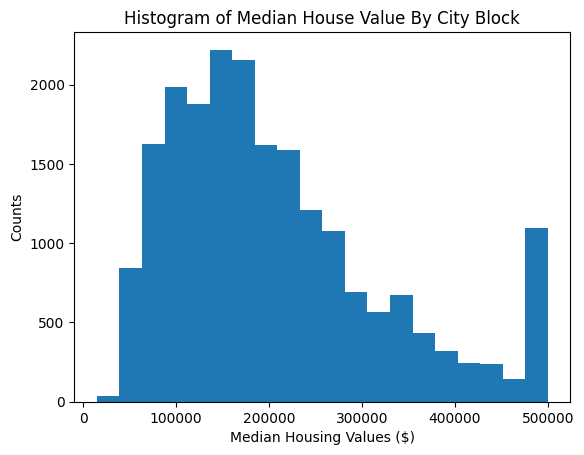

In [6]:
testing = pd.read_csv("housing.csv")
plt.hist(testing["median_house_value"], bins = 20)
plt.xlabel("Median Housing Values ($)"); plt.ylabel("Counts"); 
plt.title('Histogram of Median House Value By City Block')